In [43]:
import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,9)

### Zadanie 1

In [48]:
def v(s,t):
    return np.array([np.cos(s)*np.sin(t), np.sin(s)*np.sin(t), np.cos(t)])

S = np.random.uniform(0, 2*np.pi, 200)
T = np.random.uniform(0, np.pi, 200)

pts = v(S, T).T

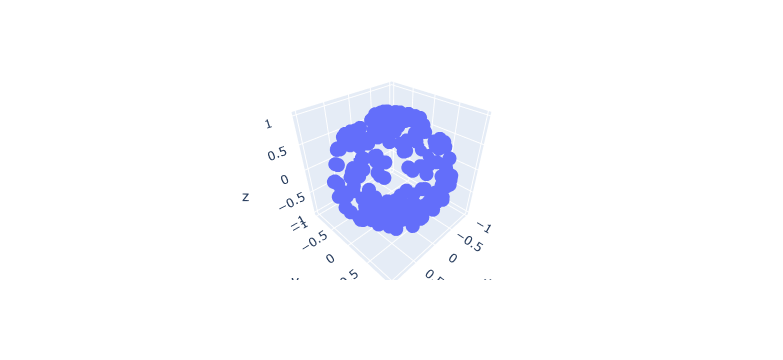

In [51]:
import plotly.express as px
import pandas as pd
pts = pd.DataFrame(pts, columns=["x", "y", "z"])
fig = px.scatter_3d(pts, x="x", y="y", z="z")
fig.show()

### Zadanie 2

In [2]:
def read_img(filename):
    img = imageio.imread(filename)
    return np.array(img)[:,:,0]

In [3]:
img = read_img('lenna.png')

In [4]:
def display_img(img):
    imgplot = plt.imshow(img, cmap='Greys_r')
    plt.show()

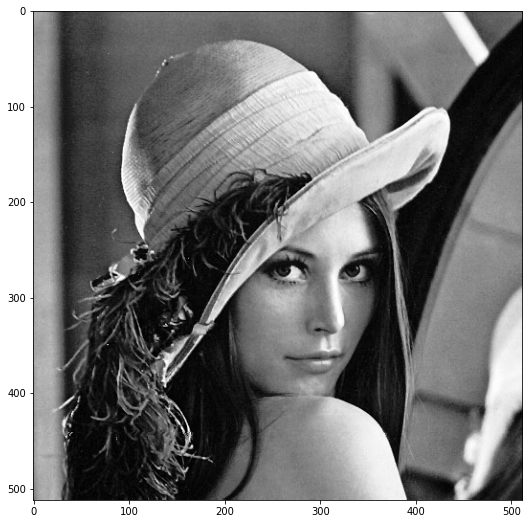

In [5]:
display_img(img)

In [6]:
def low_rank_approx(img, k, svd = None):
    u, s, v = svd or np.linalg.svd(img)
    
    img_approx = np.zeros((len(u), len(v)))
    for i in range(k):
        img_approx += s[i] * np.outer(u.T[i], v[i])
    return img_approx

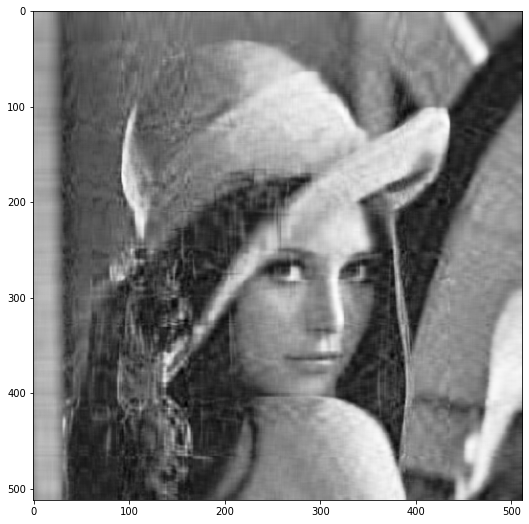

In [7]:
img_approx = low_rank_approx(img, 30)
display_img(img_approx)

<AxesSubplot:>

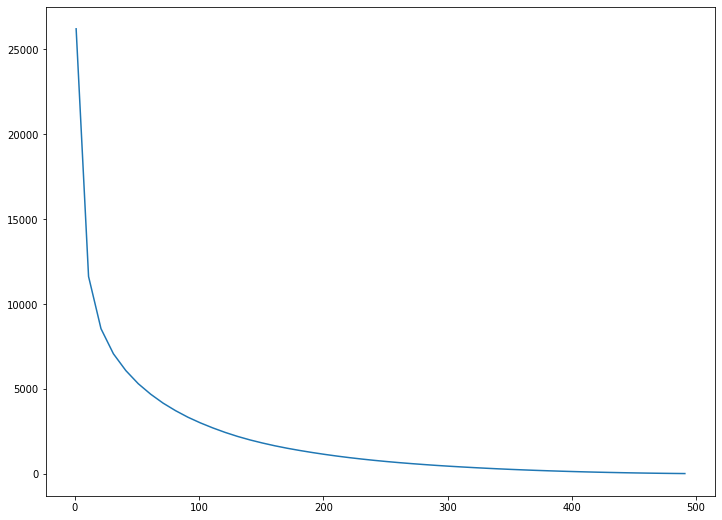

In [8]:
Y = []
X = []
imgs = []

svd = np.linalg.svd(img)
for k in range(1, 500, 10):
    img_approx = low_rank_approx(img, k, svd=svd)
    diff = np.linalg.norm(img - img_approx)
    Y.append(diff)
    X.append(k)
    imgs.append(img_approx)

sns.lineplot(x=X, y=Y)

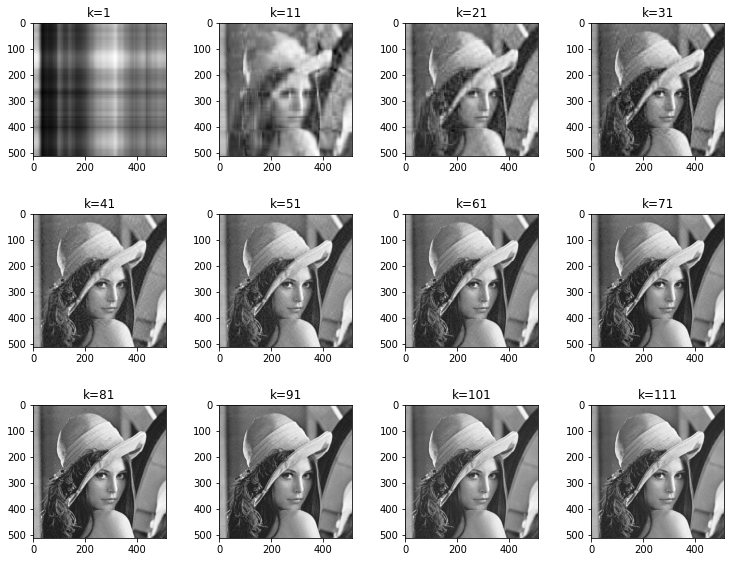

In [10]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(imgs[i], cmap='Greys_r')
    plt.title("k="+str(X[i]))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()